In [3]:
import pandas as pd
guided_cvpo_results_file_path = (
    "/home/mc/gold/logs/GOLD/SafetyCarCircle1Gymnasium-v0-cost-20/eval_result.csv"
)
default_cvpo_results_file_path = (
    "/home/mc/gold/logs/SafetyCarCircle1Gymnasium-v0-cost-20/eval_result.csv"
)
default_bc_results_file_path = (
    "/home/mc/gold/logs/OfflineCarCircle1Gymnasium-v0-cost-20/eval_result_default.csv"
)
df1 = pd.read_csv(guided_cvpo_results_file_path)
df2 = pd.read_csv(default_cvpo_results_file_path)
df3 = pd.read_csv(default_bc_results_file_path)

common_columns = list(set(df1.columns) & set(df2.columns) & set(df3.columns))
combined_df = pd.concat(
    [df1[common_columns], df2[common_columns], df3[common_columns]],
    ignore_index=True,
)

In [4]:
print(combined_df.shape)
display(combined_df.head())

(30, 6)


,Best,Model,Cost,Task,Reward,Length
0,True,bcfrontier_cvpo_default_bcfrontier_guided_cvpo...,3.62,SafetyCarCircle1Gymnasium-v0,1.807642,500.0
1,False,bcfrontier_cvpo_default_bcfrontier_guided_cvpo...,4.40,SafetyCarCircle1Gymnasium-v0,1.086304,500.0
2,True,bcfrontier_cvpo_default_bcfrontier_guided_cvpo...,54.40,SafetyCarCircle1Gymnasium-v0,6.070889,500.0
3,False,bcfrontier_cvpo_default_bcfrontier_guided_cvpo...,5.90,SafetyCarCircle1Gymnasium-v0,2.981719,500.0
4,True,bcfrontier_cvpo_default_bcfrontier_guided_cvpo...,1.88,SafetyCarCircle1Gymnasium-v0,5.045465,500.0


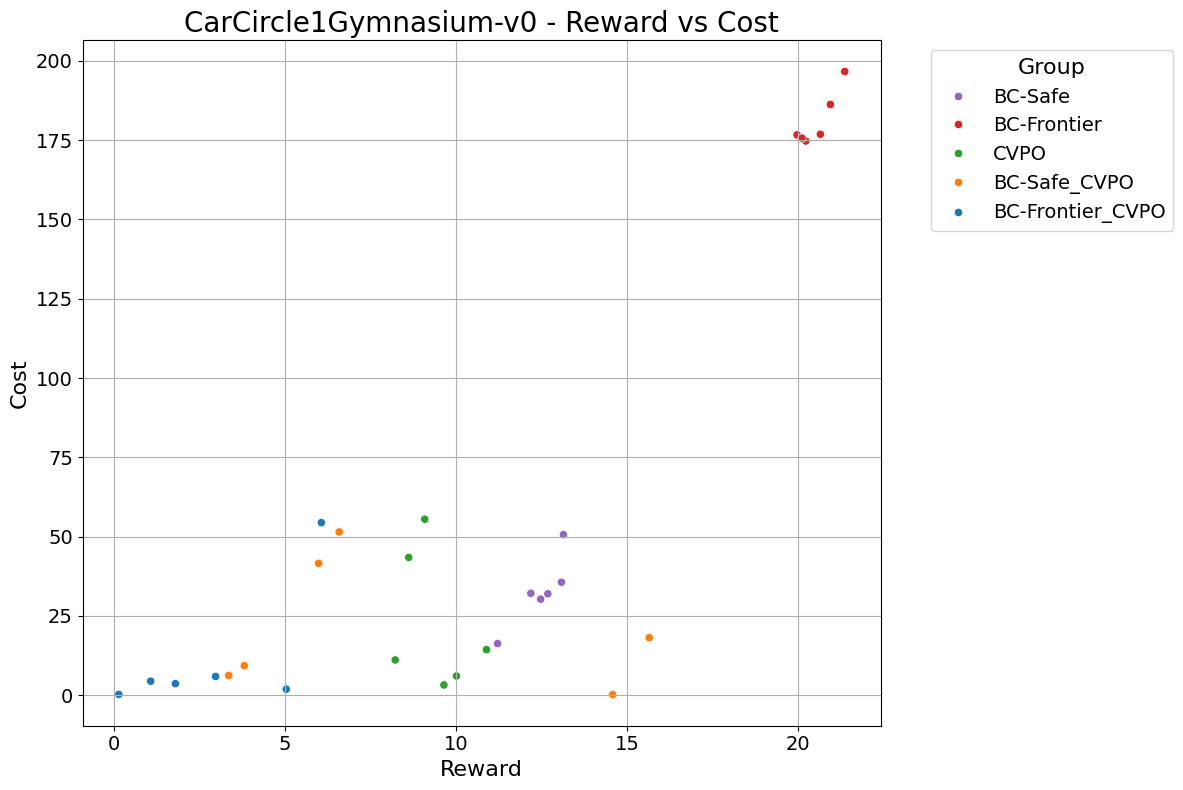

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming you have your combined DataFrame ready
# Create a new column for grouping based on the model name prefixes
def categorize_model(model_name):
    if model_name.startswith("bcfrontier_cvpo"):
        return "BC-Frontier_CVPO"
    elif model_name.startswith("bcsafe_cvpo"):
        return "BC-Safe_CVPO"
    elif model_name.startswith("cvpo"):
        return "CVPO"
    elif model_name.startswith("BC_bc_modesafe"):
        return "BC-Safe"
    elif model_name.startswith("BC_bc_modefrontier"):
        return "BC-Frontier"
    else:
        return "Other"


# Apply the function to create a new group column
# Replace 'model_column' with your actual column name containing model names
combined_df["Category"] = combined_df["Model"].apply(categorize_model)

# 繪圖
plt.figure(figsize=(12, 8))
# 建立圖
ax = sns.scatterplot(
    data=combined_df, x="Reward", y="Cost", hue="Category", palette="tab10"
)

# 設定標題與軸標籤字體大小
plt.title("CarCircle1Gymnasium-v0 - Reward vs Cost", fontsize=20)
plt.xlabel("Reward", fontsize=16)
plt.ylabel("Cost", fontsize=16)
# 設定刻度字體大小
ax.tick_params(axis="both", labelsize=14)

# 自訂順序
desired_order = ["BC-Safe", "BC-Frontier", "CVPO", "BC-Safe_CVPO", "BC-Frontier_CVPO", "Other"]
handles, labels = ax.get_legend_handles_labels()

# 依照 desired_order 重新排序
sorted_handles_labels = sorted(
    zip(labels, handles), key=lambda x: desired_order.index(x[0])
)
sorted_labels, sorted_handles = zip(*sorted_handles_labels)

# 設定 legend
plt.legend(
    sorted_handles,
    sorted_labels,
    title="Group",
    title_fontsize=16,
    fontsize=14,
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
)
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:
combined_df

NameError: name 'combined_df' is not defined

In [ ]:
import pandas as pd
import numpy as np

# 目標分組
individual_groups = [
    "BC-Safe",
    "BC-Frontier",
    "CVPO",
    "BC-Safe_CVPO",
    "BC-Frontier_CVPO",
]

# 過濾個別 group
# filtered_df = combined_df[combined_df["Category"].isin(individual_groups)]

# 統計：mean, std, count
group_stats = (
    combined_df.groupby("Category")[["Reward", "Cost"]]
    .agg(["mean", "std", "count"])
    .reset_index()
)

# 改欄位名稱
group_stats.columns = [
    "Group",
    "Reward_mean",
    "Reward_std",
    "Reward_count",
    "Cost_mean",
    "Cost_std",
    "Cost_count",
]

# 加入 95% CI
z = 1.96
group_stats["Reward_CI"] = (
    z * group_stats["Reward_std"] / np.sqrt(group_stats["Reward_count"])
)
group_stats["Cost_CI"] = (
    z * group_stats["Cost_std"] / np.sqrt(group_stats["Cost_count"])
)
group_stats["N"] = group_stats["Reward_count"]

# 重排欄位
group_stats = group_stats[
    [
        "Group",
        "N",
        "Reward_mean",
        "Reward_std",
        "Reward_CI",
        "Cost_mean",
        "Cost_std",
        "Cost_CI",
    ]
]
# 
# 顯示表格
pd.set_option("display.float_format", lambda x: f"{x:.4f}")
display(group_stats)
# 或者儲存
group_stats.to_csv("CarCircle1Gymnasium-v0_BC_CVPO.csv", index=False)

,Group,N,Reward_mean,Reward_std,Reward_CI,Cost_mean,Cost_std,Cost_CI
0,BC-Frontier,6,20.5405,0.5400,0.4321,181.1400,8.6776,6.9435
1,BC-Frontier_CVPO,6,2.8579,2.3096,1.8480,11.7400,20.9917,16.7969
2,BC-Safe,6,12.4666,0.7094,0.5676,32.8067,11.0010,8.8026
3,BC-Safe_CVPO,6,8.3325,5.4051,4.3250,21.1367,20.7256,16.5840
4,CVPO,6,9.4175,0.9746,0.7798,22.2667,21.7464,17.4007


In [44]:
new_index = [
    0, 2, 4, 1, 3
]
group_stats = group_stats.reindex(new_index).reset_index(drop=True)
group_stats

,Group,N,Reward_mean,Reward_std,Reward_CI,Cost_mean,Cost_std,Cost_CI
0,BC-Frontier,6,20.5405,0.5400,0.4321,181.1400,8.6776,6.9435
1,BC-Safe,6,12.4666,0.7094,0.5676,32.8067,11.0010,8.8026
2,CVPO,6,9.4175,0.9746,0.7798,22.2667,21.7464,17.4007
3,BC-Frontier_CVPO,6,2.8579,2.3096,1.8480,11.7400,20.9917,16.7969
4,BC-Safe_CVPO,6,8.3325,5.4051,4.3250,21.1367,20.7256,16.5840
